In [36]:
#from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from lxml import etree
from nltk import word_tokenize
import pickle
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import glob

In [25]:
ag = etree.parse('/home/pi/hola_rm_me/1501_005.xml.gz').getroot()
#dg = etree.parse('data/mathDG-2015.xml').getroot()

In [61]:
dfndum_set = set()
new_dfndum_lst = [0]
tot_dfndum_lst = [0]
rep_ratio = []
term_cnt = Counter()
for xml_path in glob.glob('/home/pi/hola_rm_me/15*.xml.gz'):
    ag = etree.parse(xml_path).getroot()
    for art in ag.iter(tag='article'):
        d_lst = [d.text for d in art.findall('.//dfndum')]
        dfndum_set.update(d_lst)
        term_cnt.update(d_lst)
        new_dfndum_lst.append(len(dfndum_set))
        tot_dfndum_lst.append(tot_dfndum_lst[-1] + len(d_lst))
        rep_ratio.append(len(dfndum_set)/tot_dfndum_lst[-1])

In [71]:
print("Total # of term: ",tot_dfndum_lst[-1])
print("# of distinct terms: ",new_dfndum_lst[-1])
term_cnt.most_common()[100000:100200]
#term_cnt['local stability properties']

Total # of term:  992852
# of distinct terms:  290994


[('de Rham space', 1),
 ('annular factor', 1),
 ('supersymmetry algebras', 1),
 ('internal bracket', 1),
 ('complex supertranslation', 1),
 ('Poincaré algebras', 1),
 ('supertranslation algebra', 1),
 ('bosonic piece', 1),
 ('supersymmetric field theory', 1),
 ('complexified Poincaré algebra', 1),
 ('super-translation algebra', 1),
 ('dimensional vector space', 1),
 ('local module structure', 1),
 ('formal derived moduli problem', 1),
 ('_inline_math_-shifted tangent complex', 1),
 ('formal derived', 1),
 ('Petersburg random variables', 1),
 ('_inline_math_-trimmed sum', 1),
 ('Petersburg sum', 1),
 ('1-trimmed sum', 1),
 ('generalized St. Petersburg distribution', 1),
 ('_inline_math_-path chromatic number', 1),
 ('_inline_math_-strong linear arboricity', 1),
 ('out-endvertex and', 1),
 ('out-endvertex', 1),
 ('directed _inline_math_-to-_inline_math_ subpath', 1),
 ('_inline_math_-vertex coloring', 1),
 ('row matrix', 1),
 ('multivariate concave function', 1),
 ('connected Eulerian di

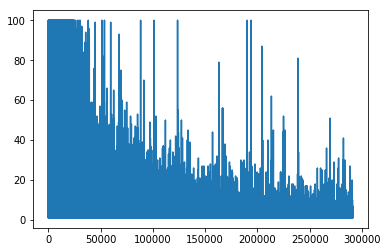

In [65]:
#plt.plot(term_cnt.values())
plt.plot([min(100,t) for t in term_cnt.values()])

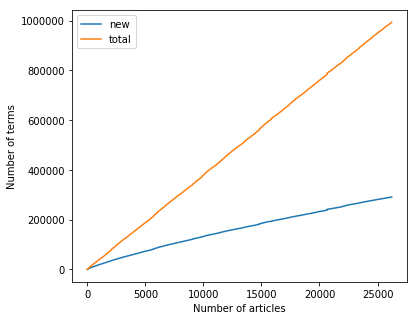

In [42]:
plt.figure(figsize=(6,5))
plt.plot(new_dfndum_lst, label='new')
plt.plot(tot_dfndum_lst, label='total')
#plt.title('New terms in math.AG 2015')
plt.ylabel('Number of terms')
plt.xlabel('Number of articles')
plt.legend()

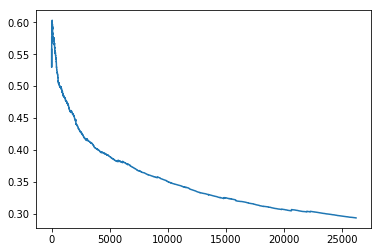

In [64]:
plt.plot(rep_ratio)

In [43]:
perc = []
for art in ag.iter(tag='article'):
    N = int(art.attrib['num'])
    perc += [int(n.attrib['index'])/N for n in art.findall('.//definition')]
for art in dg.iter(tag='article'):
    N = int(art.attrib['num'])
    perc += [int(n.attrib['index'])/N for n in art.findall('.//definition')]

NameError: name 'dg' is not defined

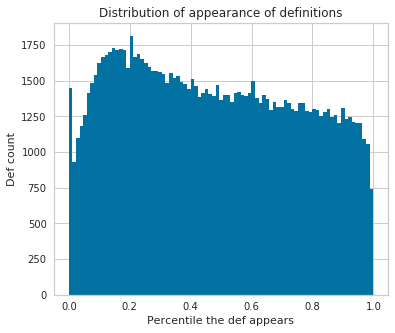

In [64]:
fig=plt.figure(figsize=(6, 5))
plt.xlabel('Percentile the def appears')
plt.ylabel('Def count')
plt.title('Distribution of appearance of definitions')
hi = plt.hist(perc, 85)

In [14]:
with open('data/mathAG_2015_just_text.txt', 'w+') as mathag:
    for k,D in enumerate(ag.iter(tag='definition')):
        try:
            print(D.find('.//dfndum').text,' --- ', (D.find('.//stmnt').text), file=mathag)
            print('***', file=mathag)
        except:
            pass
        if False: break

In [35]:
empty_if_none = lambda s: s if s else ''
ag_lst = [p.text for p in ag.iter(tag='stmnt') if len(empty_if_none(p.text))> 5][:300]
dg_lst = [p.text for p in dg.iter(tag='stmnt') if len(empty_if_none(p.text))> 5][:300]

In [7]:
with open('../PickleJar/vectorizer.pickle', 'rb') as vzer_f:
    vzer = pickle.load(vzer_f)

In [23]:
tot_vec = vzer.transform(ag_lst + dg_lst)

In [32]:
tot_vec.shape

(200, 205970)

In [33]:
# ag is zero and dg is 1
labels_vec = len(ag_lst)*['math.AG'] + len(dg_lst)*['math.DG']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


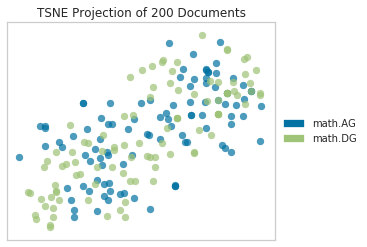

In [34]:
tsne2 = TSNEVisualizer(labels=['math.AG','math.DG'])
tsne2.fit(tot_vec, labels_vec)
tsne2.poof(figsize=50)